$
\DeclareMathOperator{\Prob}{Pr}
\renewcommand{\vec}[1]{{\underline{#1}}}
\newcommand{\dott}[2]{{{#1}^T{#2}}}
\newcommand{\mat}[1]{{\mathbf{#1}}}
$

# Programming Exercises - Set 2
This exercise set regards logistic regression. We are given two two-dimensional data sets `dataset1_logreg, dataset2_logreg`. We are going to use the gradient descent (GD) algorithm during all exercises. For each of the exercises you may have to adjust the number of iterations and the step size of the GD to get a good performance. One technique to verify if the GD is behaving properly is to plot the cost versus the number of iterations. During implementation and debugging it is helpful to carefully observe the dimensions of the objects which enter/leave the calculations.

For code brevity, we are going to use slightly different notation than during the lecture. Instead of the separate bias term $b$ in the logistic regression, i.e.,
\begin{align}
z & = \sum_{k=1}^{M} w_k x_k + b \\
& =  \dott{\vec{w}}{\vec{x}} + b,
\end{align}
we are going to replace $b$ with $w_0$ and store it inside the parameters vector $\vec{w}$, just like in the previous exercise. You also may need to extend the data vector $\vec{x}$ by additional $1$ to vectorize your code. All the derivations from the lecture should be adapted to this notation (see the third subtask in this section).  The inputs in the dataset are organized as a matrix:
\begin{align}
\begin{bmatrix}
&x_{(1),1} &\dots &x_{(1),N}\\
&x_{(2),1} &\dots &x_{(2),N}\\
\end{bmatrix},
\end{align}
and the output in the dataset are organized as a matrix: 
\begin{align}
\begin{bmatrix}
&y_1 &\dots &y_N
\end{bmatrix}.
\end{align}


## Problem 1 - Logistic Regression
We start from importing the data set and ploting the data points. There is also the normalization function implemented for you. We also computed the normalization parameters. For more about data normalization, please refer to the Problem Set 1. The problem we aim to solve is 2D logistic regression. That is, we want to develop a model for predicting the the probability that a certain point  $\vec{x}∈\mathcal{R}^2$ belongs to one of the classes $y \in \{0, 1\}$. The plot below presents the data points from the two classes.

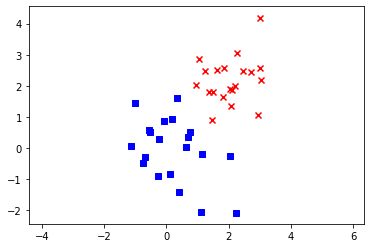

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from dataset1_logreg import DataSet

#use to compute normalizatiom parameters
def get_norm_params(x_data):
  mean_x      = np.mean(x_data[:], axis=1).reshape((-1,1))
  stdd_x      = np.std(x_data[:], axis=1).reshape((-1,1))
  return mean_x, stdd_x

#import data, plot data
y_D, x_D = DataSet.get_data()   # y_D 为label 相当于2进制； x_D第一行：x轴，第二行：y轴
DataSet.plot_data()
plt.show()

#normalization parameters
mean_x, stdd_x = get_norm_params(x_D)   


1. Initialize a variable `w` which contains the model parameters. `w` should be a numpy array of dimensions (3,1), i.e., a column vector. `w[0][0]` $= w_0$ and `w[1][0]` $= w_1$.  Use $w_0 = w_1 = w_2 = 0.1$. (you can use `type` method and `shape` property of numpy array to check if the variavble is of the expected type)

In [123]:
w = np.array([0.1, 0.1, 0.1]).reshape(-1, 1)   # np.array([0.1]*3)

2. Implement a function `predict_y1`, which takes an array of inputs $[\vec{x}_1 \dots \vec{x}_n]$ and produces an array of correspoding outputs $[a(\vec{x}_1) \dots a(\vec{x}_n)]$. Use the model  $a(\vec{x}) = g_{\text{sigmoid}}(w_0 + w_1x_1 + w_2x_2)$ ($x_1, x_2$ are the entries in the input vector). Note that the outputs should represent the probability that the label is $y$ for the given input, i.e., $a(\vec{x})=\Pr[y=1|\vec{x}]$. Perform the data normalization using the normalization parameters computed from the training set. The input is a numpy array of size $(2,n)$ and the output is a numpy array of size $(1,n)$. In the function you can use the global variable `w` containing the model parameters (from the previous point). In this case, the model will be automaticly updated when the value of `w` changes

In [124]:
def predict_y1(x_arr):
    x_arr = (x_arr - mean_x) / stdd_x
    z_x = (w[0][0] + w[1][0]*x_arr[0] + w[2][0]*x_arr[1]).reshape((1,-1))    #相当于是dot(w.T, x_arr)
    a = 1/(1 + np.exp(-z_x))       #  相当于求出 a = Py|x(1|x)
   
    return a 

3. Implement a function `ce_cost` computing the cross-entropy cost for a given model. The inputs to the function are: `x_arr` = a numpy array of size $(2,n)$ containing inputs to the model; `y_arr` = a numpy array of size $(1,n)$ containing the correspoding outputs from the data set; `predict_f` = a function handle which represents the model (eg. a function `predict_y1`). Arrange the calculations in a way to avoid numeric errors.

In [125]:
def ce_cost(x_arr, y_arr, predict_f):   # cross-entropy cost function 
    
    #y_predict = predict_f(x_arr)
    #cost = np.sqrt(np.sum((y_arr - y_predixt)**2, axis=1))  
    y_eq_0 = (y_arr==0).nonzero()[1]   # True在nonzero函数中为非0，False对应0
    y_eq_1 = (y_arr==1).nonzero()[1] 
    a = predict_f(x_arr)
    cost = np.sum( -np.log2(a[0][y_eq_1])) + np.sum( -np.log2(1-a[0][y_eq_0]))     # cost = sum(-log(a)) + sum(-log(1-a))   np.log(np.e) = 1

    return cost


We plot the decision boundaries, i.e., the set $\{\vec{x} \colon a(\vec{x})=0.5\}$,of the implemented model and compute the value of the cost function. The cost for the initial parameters `w` should be $35.831$.



cost: 35.831


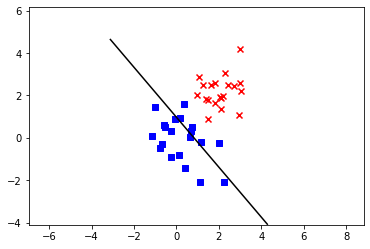

In [126]:
DataSet.plot_decision_boundary(predict_y1)
print('cost: %.3f' % ce_cost(x_D, y_D, predict_y1))


4. Compute the gradient for the current set of parameters. The gradient should be a vector of the same size as the vector `w` and should contain partial derivatives for the correspoding parameters. When correctly implemented you should obtain a vector $\nabla  w \approx [0.99, -13.58, -14.33]^T$

In [127]:
x_train = (x_D - mean_x) / stdd_x
x_train = np.vstack((np.ones((1, x_train.shape[1])), x_train))
a = predict_y1(x_D)
grad_w = np.dot(x_train, (a - y_D).T)        #梯度下降计算公式：grad_w = sum( (a - y)x )

print(grad_w)

[[  0.99136]
 [-13.57827]
 [-14.32925]]


5. Implement the gradient descent. You have to update `w` iterativley using the computed gradients. Note that `w` is a global variable used in the predicting function. Thus updating `w` automatically updates the predicting function. Use learning rate $\approx 0.01$ and $\approx 1000$ update steps.

In [128]:
x_train = (x_D - mean_x) / stdd_x
x_train = np.vstack((np.ones((1, x_train.shape[1])), x_train))

for i in range(1000):
    a = predict_y1(x_D)
    grad_w = np.dot(x_train, (a - y_D).T)
    w = w - 0.01 * grad_w  

We plot the model and compute the cost. Expected cost: $\approx 1.57$

cost: 1.573


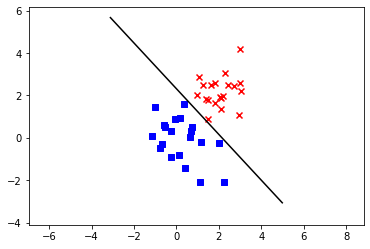

In [129]:
DataSet.plot_decision_boundary(predict_y1)
print('cost: %.3f' % ce_cost(x_D, y_D, predict_y1))

## Problem 2 - Modeling Non-linear Boundaries
In this section we will extend our model to include non-linear functions of the input data. This modification greatly improves the variety of the decision boundaries which can be generated. It is similar to the approach taken in the first problem set. Recall our input data in the training set are
\begin{align}
\begin{bmatrix}
&x_{(1),1} &\dots &x_{(1),N}\\
&x_{(2),1} &\dots &x_{(2),N}\\
\end{bmatrix}.
\end{align}
Now, we would like to perform regression also with respect to non-linear functions of this input variables. We will introduce polynomial terms up to degree $P$. In the two-dimensional case we get more terms because of the cross terms, e.g., for $P=3$ we have $9$ terms: $x_{(1)}, x_{(2)}, x_{(1)}^2, x_{(1)}x_{(2)}, x_{(2)}^2, x_{(1)}^3, x_{(1)}^2x_{(2)}, x_{(1)}x_{(2)}^2, x_{(2)}^3$ and the output matrix will be of size $10 \times N$. We extend the data in the following way:
	\begin{align}
	\begin{bmatrix}
	&x_{(1),1} 			&\dots 	&x_{(1),N} \\
	&x_{(2),1} 			&\dots 	&x_{(2),N} \\
  &x_{(1),1}^2 &\dots 	&x_{(1),N}^2\\
  &x_{(1),1}x_{(2),1} &\dots 	&x_{(1),N}x_{(2),N}\\
  &x_{(2),1}^2 &\dots 	&x_{(2),N}^2\\
	&\vdots 			&		&\vdots \\
	&x_{(1),1}x_{(2),1}^{P-1} 	&\dots 	&x_{(1),N}x_{(2),N}^{P-1}\\
	&x_{(2),1}^P 		&\dots 	&x_{(2),N}^P\\
	\end{bmatrix}.
	\end{align}
  Of course $\vec{w}$ should have now the corresponding number entries, and the data normalization should be with respect to  the newly generated matrix $\mat{X}_{\text{data}}$. $P$ should be a parameter which you can change. Note that for $P=1$ we have the same model as in the previous problem.

1. Implement the function `extend_data2D` which takes as an imput the numpy array of size $(2,n)$, e.g., the base array $X_\text{data}$, and returns  the extended array of size  $(?,n)$ as explained above. The function should take a parameter $p$ denoting the highest power in the array.

In [130]:
def extend_data2D(x, p):           #对于range(1,n)范围不含n;  range(n) 范围从0-9
    #for i in range(1, p+1):
            #x_ext = [(x[0,:]**(i-k))*(x[1,:]**k) for k in range(0,i+1)]         #为什么分开写不行？分开写怎样赋值才可？
    x_ext = [[(x[0,:]**(i-k))*(x[1,:]**k) for k in range(0,i+1)] for i in range(1, p+1)]
    x_e = np.vstack(x_ext)  
      
    return x_e   

We set the parameter $P$ to $7$ and compute the parameters needed for normalization.

In [131]:
P = 7
#print(x_D)
x_De = extend_data2D(x_D, P)
#print(x_De)
x_De_mean, x_De_stdd = get_norm_params(x_De)



2. Initialize the variable `w` which contains the model parameters. The dimiension of `w` should depend on the parameter P. The entires of `w` should satisfy:$w_i=0.1$.

In [132]:
w = np.array([0.1]*((3+P)*P//2+1)).reshape((-1,1))   # (2 + P+1)*P/2求项数； 还得+1 w0;  //表示取整
#print(w)

3. Implement a function `predict_y2`, which takes an array of inputs $[\vec{x}^{(1)} \dots \vec{x}^{(n)}]$ and produces an array of correspoding outputs $[a(\vec{x}^{(1)}) \dots a(\vec{x}^{(n)})]$. Use a linear model with respect to the extended dataset followed by a sigmoid activation function. Note that the outputs should represent the probability that the label is $y$ for the given input, i.e., $a(\vec{x})=\Pr[y=1|\vec{x}]$. Perform the data normalization using the normalization parameters computed from the training set. The input is a numpy array of size $(2,n)$ and the output is a numpy array of size $(1,n)$. In the function you can use the global variable `w` containing the model parameters (from the previous point). In this case, the model will be automaticly updated when the value of `w` changes

In [133]:
def predict_y2(x_arr):
    x = extend_data2D(x_arr, P)
    x_norm = (x - x_De_mean) / x_De_stdd
    x_pred = np.vstack((np.ones((1,x_norm.shape[1])), x_norm))
    z = np.dot(w.T, x_pred)
    a = 1/(1+np.exp(-z))
    
    return a 

We plot the model and compute the cost. Expected cost: $\approx 22$

cost: 22.031


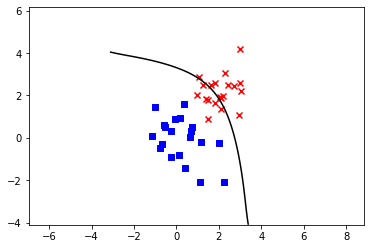

In [134]:
DataSet.plot_decision_boundary(predict_y2)
print('cost: %.3f' % ce_cost(x_D, y_D, predict_y2))

4. Compute the gradient for the current set of parameters. The gradient should be a vector of the same size as the vector `w` and should contain partial derivatives for the correspoding parameters. When correctly implemented you should obtain a vector $\nabla  w \approx [-3.66, -5.78, ...]^T$

In [135]:
x_train = (x_De - x_De_mean) / x_De_stdd
x_train = np.vstack((np.ones((1,x_train.shape[1])), x_train))
a1 = predict_y2(x_D)
grad_w = np.dot(x_train, (a1-y_D).T)

print(grad_w)

[[-3.65861]
 [-5.78313]
 [-7.39182]
 [-2.85953]
 [-5.39512]
 [-3.9898 ]
 [-1.70739]
 [-2.92871]
 [-2.18082]
 [-3.15033]
 [-0.65461]
 [-1.51933]
 [-0.70869]
 [-1.38518]
 [-1.10615]
 [-0.15907]
 [-0.62032]
 [-0.01283]
 [-0.37259]
 [-0.17745]
 [-0.64749]
 [ 0.17876]
 [-0.09359]
 [ 0.38395]
 [ 0.11875]
 [ 0.29363]
 [ 0.03779]
 [ 0.00344]
 [ 0.36748]
 [ 0.24274]
 [ 0.59146]
 [ 0.39037]
 [ 0.50495]
 [ 0.3548 ]
 [ 0.36041]
 [ 0.17708]]


5. Implement the gradient descent. You have to update `w` iterativley using the computed gradients. Note that `w` is a global variable used in the predicting function. Thus updating `w` automatically updates the predicting function. Use learning rate $\approx 0.3$ and $\approx 30000$ update steps.

In [136]:
x_train = (x_De - x_De_mean) / x_De_stdd
x_train = np.vstack((np.ones((1,x_train.shape[1])), x_train))

for i in range(30000):
    a1 = predict_y2(x_D)
    grad_w = np.dot(x_train, (a1-y_D).T)
    w = w - 0.3 * grad_w

We plot the model and compute the cost. Expected cost: $\approx 0.002$

cost: 0.002


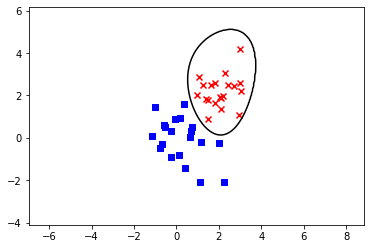

In [137]:
DataSet.plot_decision_boundary(predict_y2)
print('cost: %.3f' % ce_cost(x_D, y_D, predict_y2))

We now import a new data set. Please run the code in the cell below and go back to the begining of  Problem 2. Then re-run the cells. What do you observe?

In [138]:
from dataset2_logreg import DataSet
y_D, x_D = DataSet.get_data()


#              /\
#             /  \
#            /    \
#              ||
#              ||
#              ||
#              ||

# rerun the code with the new data set



## Problem 3 - Regularization

The phenomenon from the last figure is called over-fitting. The model is too complex and the model has also "learned the noise". The model contains ca. $45$ parameters in  $\vec{w}$ but the DataSet contains roughly ~$5$-$10$ parameters, so there is still space left for learning "too much". We would like to discourage complex model although it achieves better performance (lower cost) - this process is called **regularization**. In the end, we are interested in the performance on the unseen samples, which decreases when a model over-fits.
	We would like to have a simpler model but still flexible, i.e., keep high value of $P$ (higher $P$ allows for more complex decision boundaries when needed). This can be done by a regularization technieque called **weight decay**. The idea is as follows: we modify the cost function by adding the term $\lambda \|\vec{w}\|^2$ with some constant $\lambda \ge 0$. This introduces penalty for using parameters with higher magnitude, thus it limits our parameter space and encourages simpler models. Higher value of $\lambda$ penalize $\|\vec{w}\|^2$ more and result in simpler models. We use the modified cost function to train the model (modification of the cost function results in different gradients). In practice we do not penalize large values of the bias term, that is, $w_0$.The cost function from which we derive the gradients is  now:
	$$\sum_{i=1}^{N} \left\{  -y_{i} \log(a(\vec{x}_i))  -(1-y_i)\log(1-a(\vec{x}_i))\right\} + \lambda \|\vec{w}_{1:}\|^2,$$
 with $\vec{w} = [w_0 \vec{w}_{1:}]$ (the bias term is not included in the new cost function). We are going to use the model from the previous exercise but the training will be done with the regularization.

1. Initialize w to a vector of values $0.1$. Derive the formula for the gradient using the regularized cost function and compute the gradient. We initialize the constant $\lambda$ to $0.08$. When everything is done correctly gradinet should be $\nabla  w \approx [0.03, 9.27, 8.47,...]^T$

In [140]:
lbd = 0.08

w = np.array([0.1]*((P*(P+3))//2 +1)).reshape((-1,1))


x_train = extend_data2D(x_D, P)
x_De_mean, x_De_stdd = get_norm_params(x_train)

x_train = (x_train - x_De_mean)/x_De_stdd    #答案中掉了！！！
x_train = np.vstack((np.ones((1,x_train.shape[1])), x_train))
a1 = predict_y2(x_D)
grad_reg = 2*lbd*w       #𝜆||w||2 的导数-- 2𝜆w  ？？？
grad_reg[0][0] = 0
grad_w = np.dot(x_train, (a1-y_D).T) + grad_reg


print(grad_w)

[[  0.02709]
 [  9.27137]
 [  8.4741 ]
 [-15.05278]
 [ -1.94707]
 [-20.50985]
 [  4.29449]
 [  8.43441]
 [ 11.2194 ]
 [  8.99919]
 [ -7.44116]
 [ -2.49246]
 [-16.17223]
 [ -4.90081]
 [-15.00272]
 [  2.39816]
 [  6.33814]
 [  9.57878]
 [  8.8667 ]
 [  9.58275]
 [  9.23262]
 [ -3.57106]
 [ -2.67767]
 [-13.27346]
 [ -6.19621]
 [-11.5901 ]
 [ -6.99494]
 [-11.77237]
 [  1.41795]
 [  3.65391]
 [  8.63921]
 [  9.15029]
 [  9.11147]
 [  8.66655]
 [  8.93067]
 [  9.18095]]


2. Implement the gradient descent using the gradients from the regularized cost function. You have to update `w` iterativley using the computed gradients. Note that `w` is a global variable used in the predicting function. Thus updating `w` automatically updates the predicting function. Use learning rate $\approx 0.1$ and $\approx 30000$ update steps.

In [141]:
x_train = extend_data2D(x_D, P)
x_De_mean, x_De_stdd = get_norm_params(x_train)
x_train = (x_train-x_De_mean)/x_De_stdd
x_train = np.vstack((np.ones((1,x_train.shape[1])), x_train))

for i in range(30000):
    a1 = predict_y2(x_D)
    grad_reg = 2*lbd*w       #𝜆||w||2 的导数-- 2𝜆w
    grad_reg[0][0] = 0
    grad_w = np.dot(x_train, (a1-y_D).T) + grad_reg

    w = w - 0.1 * grad_w

We plot the model and compute the cost (using the original cost function). Expected cost: $\approx 24$

cost: 24.143


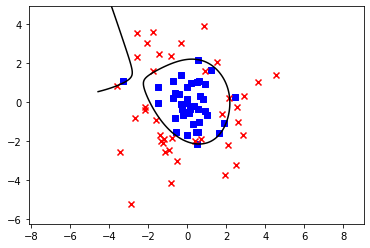

In [142]:
DataSet.plot_decision_boundary(predict_y2)
print('cost: %.3f' % ce_cost(x_D, y_D, predict_y2))